In [1]:
import numpy as np
import pandas as pd
#%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data dimensionality, distance-based classifiers
Excercise with mnist digit dataset. Lets first load the data and take a peek:

In [3]:
X_train = pd.read_csv('./data/train_in.csv',header=None)
Y_train = pd.read_csv('./data/train_out.csv',header=None)
df_train = X_train.copy()
df_train['label']=Y_train

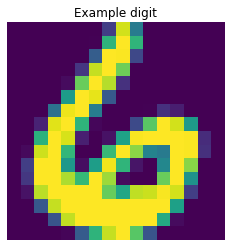

Figure 1: Exapmle of one element in the dataset


In [29]:
def show_number(nr,data):    
    X=np.array(data)
    X=np.reshape(X[nr,:],(16,16))
    imgplot = plt.imshow(X)
    plt.axis('off')
    
    plt.title('Example digit')
    plt.show()
show_number(0,X_train)
print('Figure 1: Exapmle of one element in the dataset')

How big is the difference between numbers?

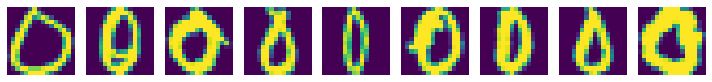

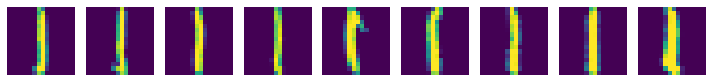

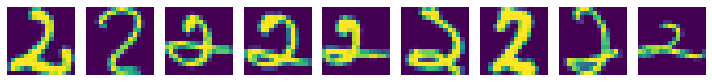

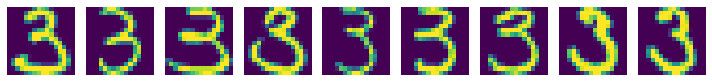

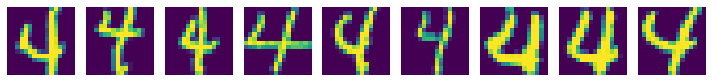

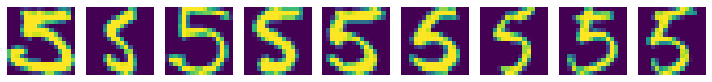

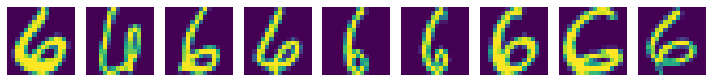

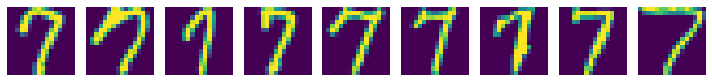

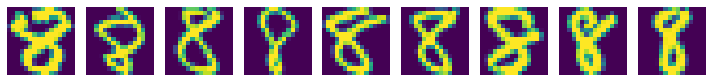

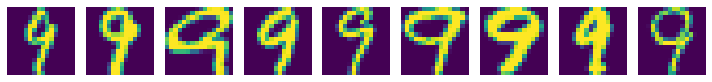

Figure 2: first 9 appearances of each digit


In [30]:
def get_image(nr,data):
    if 'label' in data.columns:
        data=np.array(data.drop('label',axis=1))
    else:
        data=data.values
    return np.reshape(data[nr,:],(16,16))

def display_multiple_img(images, rows = 3, cols=3):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

def display_digits(digit,data,rows,cols):
    total_images = rows*cols
    index=data.loc[data.label==digit].index[:total_images]
    images = {'Image'+str(i):get_image(i,data) for i in index}
    display_multiple_img(images, rows, cols)

    
for i in range(10):
    display_digits(i,df_train,rows=1,cols=9)
print('Figure 2: first 9 appearances of each digit')

For each digit d in range(10) calculate the 'centre': $c_{d}$ as the mean of allcoordinates of vectors constructin $C_{d}$.

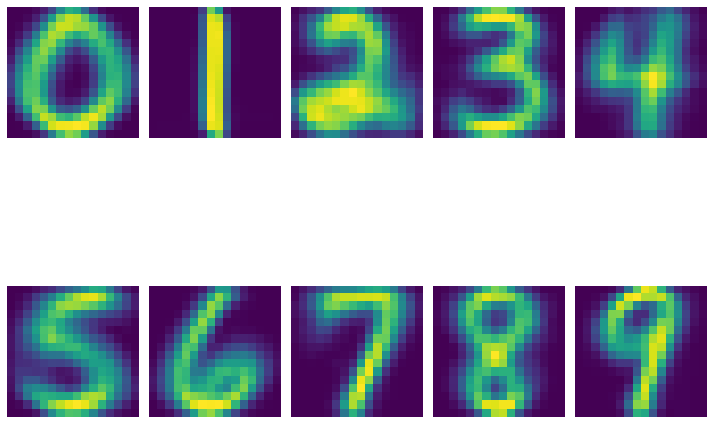

Figure 3: The average digits


In [31]:
c_ds=df_train.groupby('label').mean()

images = {'Image'+str(i):get_image(i,c_ds) for i in range(10)}
display_multiple_img(images, 2,5)
print('Figure 3: The average digits')

Next, calculate the distances between the centers of the 10 clouds, $dist_{ij} = dist(c_{i}; c_{j} )$, for
$i,j = 0,1,...9$.

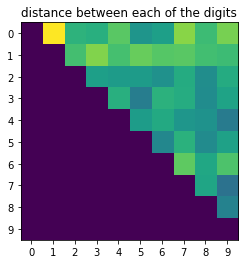

Figure 4: Distances of averages


In [34]:
from itertools import product
dist_ij=np.zeros((10,10))
for i,j in product(range(10),range(10)):
    if j>=i:
        dist_ij[i,j]=np.linalg.norm(c_ds.iloc[i].values-c_ds.iloc[j].values)
imgplot = plt.imshow(dist_ij)
plt.title(label='distance between each of the digits')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()
print('Figure 4: Distances of averages')

#### Question
Given all these distances, try to say something about the expected accuracy of your
classifier. What pairs of digits seem to be most difficult to separate?
#### Answer
Looking at the graph i would suspect its hard to distinguish between 4 and 9, 7 and 9, 8 and 9, 3 and 5.  

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding

In [72]:
#Dimension reduction
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)
tsne = TSNE(n_components=2)

methods={'pca':pca,'lle':lle,'tsne':tsne}
dfs=dict()
for key in methods:
    X=methods[key].fit_transform(X_train)
    df=pd.DataFrame(X)
    df['label']=Y_train
    dfs[key]=df.groupby('label').mean()

def scatter_plot(c_ds,title):
    plt.scatter(c_ds.values[:,0],c_ds.values[:,1])
    plt.title(title)
    for i in range(10):
        label = f"{c_ds.index[i]}"
        plt.annotate(label, # this is the text
             (c_ds.values[i,0],c_ds.values[i,1]), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or     

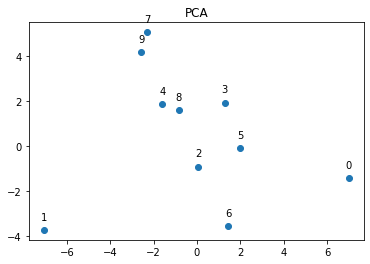

In [77]:
scatter_plot(dfs['pca'],'PCA')

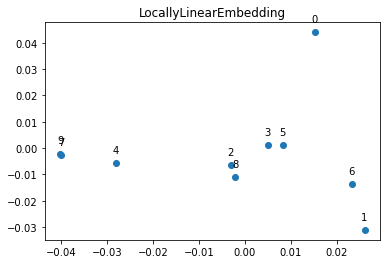

In [76]:
scatter_plot(dfs['lle'],'LocallyLinearEmbedding')

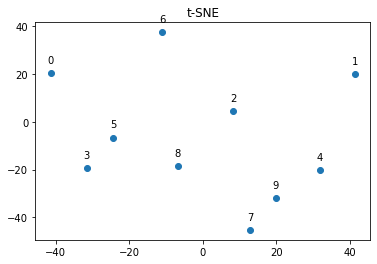

In [78]:
scatter_plot(dfs['tsne'],'t-SNE')

In [124]:
#chance at 0
df_inf=pd.DataFrame()
for i in range(10):
    df=X_train-c_ds.iloc[i]
    df_inf[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
df_inf

,0,1,2,3,4,5,6,7,8,9
0,10.775343,15.382765,12.442124,13.565305,13.801060,11.648341,8.374793,15.958980,13.716205,15.588175
1,13.042792,18.693651,14.592786,13.766085,16.889340,12.371951,15.330994,16.799755,15.632938,16.601801
2,13.625241,16.146386,12.211555,13.167415,9.521794,12.630480,12.228531,12.877055,12.917250,12.436665
3,13.680419,12.733610,11.513550,11.257821,10.099275,11.794416,13.423057,6.435935,10.084407,6.952273
4,12.641107,15.251902,11.987980,8.102630,14.033999,10.597402,13.054109,14.207000,11.865777,13.152619
...,...,...,...,...,...,...,...,...,...,...
1702,13.833463,11.201195,10.543662,10.681983,11.361148,11.160706,11.848500,12.398731,7.992859,10.795493
1703,13.994200,9.594817,10.973975,11.538954,9.506348,11.243344,12.289461,10.460990,8.992205,7.494314
1704,14.165019,11.975320,10.754087,10.689856,9.554619,11.568231,12.618434,6.050332,10.364465,7.071513
1705,14.447300,11.513735,11.429374,11.852311,11.367451,11.862008,13.323193,10.791623,9.203248,8.059518


In [139]:
prediction=np.zeros(1707)
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)
prediction

array([6., 5., 4., ..., 7., 9., 8.])

In [151]:
score_train=(len(Y_train)-np.sum(prediction-Y_train.values.T))/len(Y_train)
score_train

0.8980667838312829

In [150]:
X_test = pd.read_csv('./data/test_in.csv',header=None)
Y_test = pd.read_csv('./data/test_out.csv',header=None)

In [153]:
df_inf=pd.DataFrame()
for i in range(10):
    df=X_test-c_ds.iloc[i]
    df_inf[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
prediction=np.zeros(len(X_test))
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)

score_test=(len(Y_test)-np.sum(prediction-Y_test.values.T))/len(Y_test)
score_test

0.833

In [80]:
distances=[]
for i in range(9):
    distances.append(np.linalg.norm(X_train.iloc[0]-c_ds.iloc[i].values))
print(distances.index(min(distances)))


6
